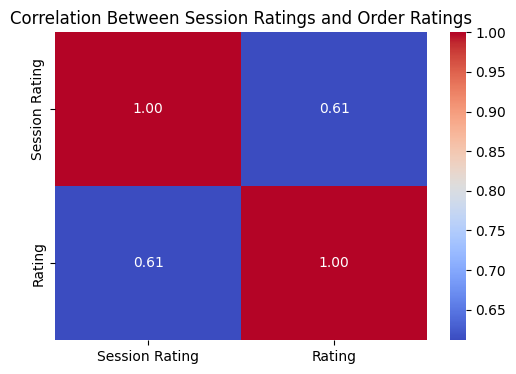

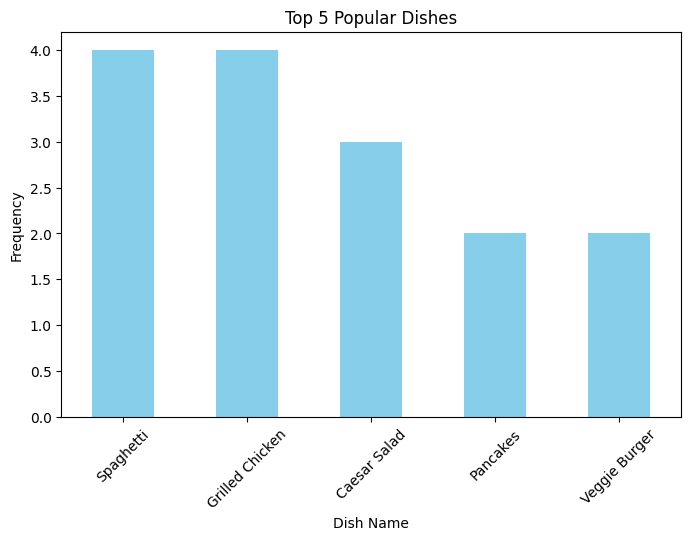

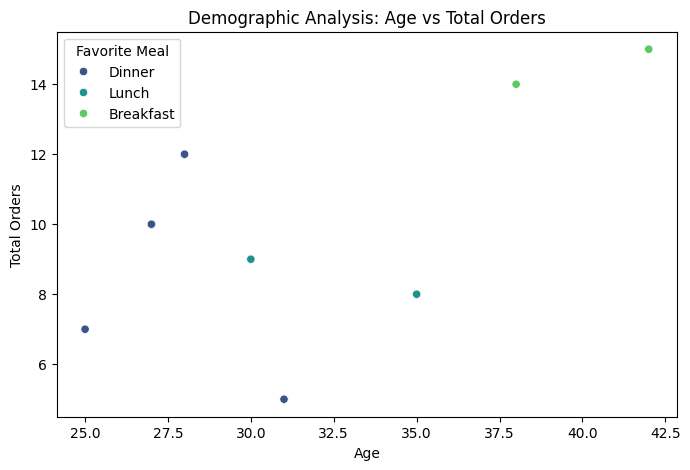

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/Data Analyst Intern Assignment - Excel.xlsx'
user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')

order_details['Rating'] = order_details['Rating'].fillna(order_details['Rating'].mean())

merged_data = pd.merge(cooking_sessions, order_details, on=['Session ID', 'User ID'], how='inner')
merged_data = pd.merge(merged_data, user_details, on='User ID', how='inner')

session_order_correlation = merged_data[['Session Rating', 'Rating']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(session_order_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Session Ratings and Order Ratings')
plt.show()

popular_dishes = merged_data['Dish Name_x'].value_counts()
popular_dishes.head(5).plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Top 5 Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_data, x='Age', y='Total Orders', hue='Favorite Meal', palette='viridis')
plt.title('Demographic Analysis: Age vs Total Orders')
plt.xlabel('Age')
plt.ylabel('Total Orders')
plt.legend(title='Favorite Meal')
plt.show()


User Details Columns: Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders'],
      dtype='object')
Cooking Sessions Columns: Index(['Session ID', 'User ID', 'Dish Name', 'Meal Type', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating'],
      dtype='object')
Order Details Columns: Index(['Order ID', 'User ID', 'Order Date', 'Meal Type', 'Dish Name',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Session ID'],
      dtype='object')
Merged Data Columns: Index(['Session ID', 'User ID', 'Dish Name_x', 'Meal Type_x', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating', 'Order ID',
       'Order Date', 'Meal Type_y', 'Dish Name_y', 'Order Status',
       'Amount (USD)', 'Time of Day', 'Rating', 'User Name', 'Age', 'Location',
       'Registration Date', 'Phone', 'Email', 'Favorite Meal', 'Total Orders'],
      dtype='object')
'Meal Type' column is missing

<ipython-input-49-856e45aa149b>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Count', y='Dish Name', data=popular_dishes.head(10), palette='Set2')


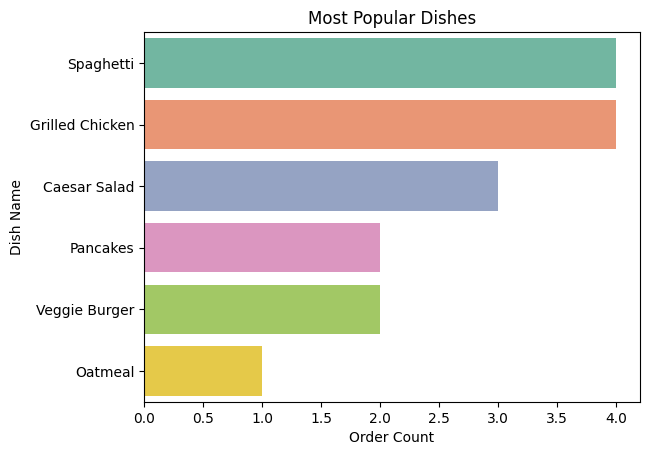

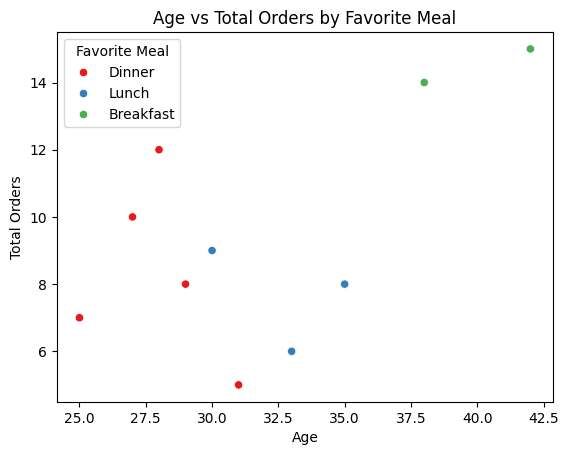

Age Distribution:
count    10.000000
mean     31.800000
std       5.266245
min      25.000000
25%      28.250000
50%      30.500000
75%      34.500000
max      42.000000
Name: Age, dtype: float64

Meal Order Analysis:
  Favorite Meal  Total Orders
0     Breakfast            29
1        Dinner            42
2         Lunch            23

Location Order Analysis:
        Location  Total Orders
0         Austin             7
1         Boston            14
2        Chicago            15
3         Dallas             6
4    Los Angeles             8
5          Miami             5
6       New York            12
7        Phoenix             8
8  San Francisco            10
9        Seattle             9


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/Data Analyst Intern Assignment - Excel.xlsx'
user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')

print("User Details Columns:", user_details.columns)
print("Cooking Sessions Columns:", cooking_sessions.columns)
print("Order Details Columns:", order_details.columns)

order_details['Rating'] = order_details['Rating'].fillna(order_details['Rating'].mean())

merged_data = pd.merge(cooking_sessions, order_details, on=['Session ID', 'User ID'], how='inner')
merged_data = pd.merge(merged_data, user_details, on='User ID', how='inner')

print("Merged Data Columns:", merged_data.columns)


if 'Meal Type' in merged_data.columns:
    order_ratings = merged_data.groupby(['User ID', 'Meal Type']).agg({'Rating': 'mean', 'Amount (USD)': 'sum'}).reset_index()
else:
    print("'Meal Type' column is missing from the data.")
    order_ratings = None

if 'Dish Name_x' in merged_data.columns:
    popular_dishes = merged_data['Dish Name_x'].value_counts().reset_index()
    popular_dishes.columns = ['Dish Name', 'Order Count']
else:
    print("'Dish Name_x' column is missing from the data.")
    popular_dishes = None

if 'Dish Name_x' in merged_data.columns and 'Rating' in merged_data.columns:
    average_ratings = merged_data.groupby('Dish Name_x')['Rating'].mean().reset_index()
else:
    print("'Dish Name_x' or 'Rating' column is missing from the data.")
    average_ratings = None

age_distribution = user_details['Age'].describe()
meal_order_analysis = user_details.groupby('Favorite Meal')['Total Orders'].sum().reset_index()
location_order_analysis = user_details.groupby('Location')['Total Orders'].sum().reset_index()


if 'Time Of Day' in merged_data.columns:
    meal_time_dist = merged_data['Time Of Day'].value_counts()
    meal_time_dist.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['skyblue', 'orange', 'green'])
    plt.title('Percentage of Orders by Time of Day')
    plt.ylabel('')
    plt.show()
else:
    print("'Time Of Day' column is missing from the data.")

if popular_dishes is not None:
    sns.barplot(x='Order Count', y='Dish Name', data=popular_dishes.head(10), palette='Set2')
    plt.title('Most Popular Dishes')
    plt.xlabel('Order Count')
    plt.ylabel('Dish Name')
    plt.show()

sns.scatterplot(x='Age', y='Total Orders', data=user_details, hue='Favorite Meal', palette='Set1')
plt.title('Age vs Total Orders by Favorite Meal')
plt.xlabel('Age')
plt.ylabel('Total Orders')
plt.show()

print("Age Distribution:")
print(age_distribution)
print("\nMeal Order Analysis:")
print(meal_order_analysis)
print("\nLocation Order Analysis:")
print(location_order_analysis)
